<h1><center>Capstone Project<h1>

###  Is your drive a SmartWay??



### Introduction


Global warming and climate changes are existential threats to human race. The rate at which warming takes place is much faster than the Permian-Triassic extinction warming event. Extreme warming events always involve the same invisible culprit, one we’re familiar with today: A massive dose of carbon dioxide, or CO2.  With this rapid growth in technology; rapid industrialization and the race for being economic superpower, CO2 emission had increased exponentially. 
        

The number of motorized vehicles (cars and trucks) in 2015 were around __1.5 billion.__ The number is expected to climb to more than __2 billion__ by 2025. With the number of vehicles increasing at this rate, it is recommended to drive environmentally safe vehicles. In this project, the 2020 office of Energy efficiency & renewable energy guide data ( https://fueleconomy.gov/feg/download.shtml)  will be used to create a model predicting if a given vehicle falls within the category of SmartWay vehicle.

### Business Problem/ Justification

__Greenhouse Gas Score__ and __Air Pollution Score (smog score)__ are the key variables in determining if your drive is “green vehicle”. With this era of growing traffic and CO2 emission, it is advisable to use vehicles that qualify for SmartWay. This project will train a model to predict if a given vehicle is SmartWay vehicle based on various independent variables.


Moving forward, the pollution score and Greenhouse gas score of vehicles should be one of the key criteria when people go for car hunting, along with price and other criteria.

### Importing packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Reading the data to use for training our model

We will use __read_excel()__ function of pandas to import the data into our data frame named __df__

In [2]:
df = pd.read_excel('Data/all_alpha_20.xlsx')
df.head(10)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333
3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.5PBM,small SUV,3,20,27,23,5,No,387
5,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV03.5PBM,small SUV,3,20,27,23,5,No,387
6,ACURA MDX,3.5,6.0,SemiAuto-9,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.5PBM,small SUV,3,19,26,22,4,No,404
7,ACURA MDX,3.5,6.0,SemiAuto-9,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV03.5PBM,small SUV,3,19,26,22,4,No,404
8,ACURA MDX A-spec,3.5,6.0,SemiAuto-9,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.5PBM,small SUV,3,19,25,21,4,No,415
9,ACURA MDX A-spec,3.5,6.0,SemiAuto-9,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV03.5PBM,small SUV,3,19,25,21,4,No,415


<h2 id="understanding_data">Understanding the Data</h2>

Let's use __df.shape__ or __df.info()__ function to know about our data.

In [3]:
df.shape

(2523, 18)

As shown, the data has __2523__ observations(rows) and __18__ variables(columns).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2523 entries, 0 to 2522
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2523 non-null   object 
 1   Displ                 2442 non-null   float64
 2   Cyl                   2442 non-null   float64
 3   Trans                 2523 non-null   object 
 4   Drive                 2523 non-null   object 
 5   Fuel                  2523 non-null   object 
 6   Cert Region           2523 non-null   object 
 7   Stnd                  2523 non-null   object 
 8   Stnd Description      2523 non-null   object 
 9   Underhood ID          2523 non-null   object 
 10  Veh Class             2523 non-null   object 
 11  Air Pollution Score   2523 non-null   int64  
 12  City MPG              2523 non-null   object 
 13  Hwy MPG               2523 non-null   object 
 14  Cmb MPG               2523 non-null   object 
 15  Greenhouse Gas Score 

We will be using parameters such as __Hwy MPG, Cmb MPG, City MPG, Cyl and Comb CO2__ as independent variables to predict for __Air pollution score__ and __Green house score__ for our mulitple linear regression. However, we should convert the data type of City MPG, Cmb MPG, Hwy MPG and Comb CO2 into either float or integer to conduct the regression.


First let's get rid of vehicles that function with electricity and Hydrogen. Those vehicles are environmentally friendly by nature.

In [5]:
df= df[df.Fuel != 'Gasoline/Electricity']

In [6]:
df =df[df.Fuel != 'Hydrogen']

In [7]:
df =df[df.Fuel != 'Electricity']

Let's check how many rows are left

In [8]:
df.shape

(2356, 18)

We are now down __2356__ observations (rows)

Now lets format the variables of interest into numerical values.

In [9]:
#df['Comb CO2', 'Hwy MPG','City MPG', 'Cmb MPG'].astype('int64')
df['Comb CO2']= df['Comb CO2'].astype("int64")
df['Hwy MPG']= df['Hwy MPG'].astype("int64")
df['City MPG']= df['City MPG'].astype("int64")
df['Cmb MPG']= df['Cmb MPG'].astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2520
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2356 non-null   object 
 1   Displ                 2356 non-null   float64
 2   Cyl                   2356 non-null   float64
 3   Trans                 2356 non-null   object 
 4   Drive                 2356 non-null   object 
 5   Fuel                  2356 non-null   object 
 6   Cert Region           2356 non-null   object 
 7   Stnd                  2356 non-null   object 
 8   Stnd Description      2356 non-null   object 
 9   Underhood ID          2356 non-null   object 
 10  Veh Class             2356 non-null   object 
 11  Air Pollution Score   2356 non-null   int64  
 12  City MPG              2356 non-null   int64  
 13  Hwy MPG               2356 non-null   int64  
 14  Cmb MPG               2356 non-null   int64  
 15  Greenhouse Gas Score 

### Descriptive statistics.

Now let's get an overall flavor of the data using __df.describe()__ function.

In [10]:
df.describe(include="all")

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
count,2356,2356.000000,2356.000000,2356,2356,2356,2356,2356,2356,2356,2356,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,2356,2356.000000
unique,624,NaN,NaN,27,2,3,2,13,13,364,10,NaN,NaN,NaN,NaN,NaN,3,NaN
top,CHEVROLET Silverado,NaN,NaN,SemiAuto-8,2WD,Gasoline,CA,T3B70,Federal Tier 3 Bin 70,LBMXJ02.0B4X,small car,NaN,NaN,NaN,NaN,NaN,No,NaN
freq,40,NaN,NaN,599,1247,2268,1180,395,395,58,707,NaN,NaN,NaN,NaN,NaN,2094,NaN
mean,NaN,3.094015,5.591681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.559847,20.787351,27.489813,23.293294,4.580221,NaN,403.562818
std,NaN,1.310407,1.854494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.736404,6.429446,6.321693,6.316572,1.701484,NaN,96.054748
min,NaN,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,9.000000,13.000000,10.000000,1.000000,NaN,154.000000
25%,NaN,2.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,17.000000,23.000000,19.000000,3.000000,NaN,337.000000
50%,NaN,3.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,20.000000,27.000000,23.000000,4.000000,NaN,396.000000
75%,NaN,3.600000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,23.000000,31.000000,26.000000,5.000000,NaN,462.000000


From our dataset,
- GMC Sierra is the most commonly encountered vehicle.
- SemiAuto-8 is the most common transmission type.
- 2WD is the most common drive type.
- Gasoline is the most commonly used feul.
- The average CO2 combustion in all vehicle is 403
- The City, Hwy and Combined MPG are 20.787351, 27.489813 and 23.293294 respectively.

Now let's create __df2__, a subset of __df__ containing the variables needed for training and testing our model.

In [11]:
df.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay', 'Comb CO2'],
      dtype='object')

In [12]:
df2 = df[['Cyl','Air Pollution Score','Greenhouse Gas Score','City MPG','Hwy MPG','Cmb MPG','Comb CO2']]
df2.head()

,Cyl,Air Pollution Score,Greenhouse Gas Score,City MPG,Hwy MPG,Cmb MPG,Comb CO2
0,4.0,3,6,24,34,28,316
1,4.0,3,6,24,34,28,316
2,6.0,3,6,26,27,27,333
3,6.0,3,6,26,27,27,333
4,6.0,3,5,20,27,23,387


### Rename columns

Let's rename the columns for easier computation.

In [13]:
df2.rename(columns={"Air Pollution Score": "Pollution_score", "Greenhouse Gas Score": "Greenhouse_score", "City MPG":"City_MPG", "Hwy MPG":"Hwy_MPG", "Cmb MPG":"Cmb_MPG","Comb CO2":"Comb_CO2" }, inplace=True)
df2.head()

C:\Users\gmela\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Cyl,Pollution_score,Greenhouse_score,City_MPG,Hwy_MPG,Cmb_MPG,Comb_CO2
0,4.0,3,6,24,34,28,316
1,4.0,3,6,24,34,28,316
2,6.0,3,6,26,27,27,333
3,6.0,3,6,26,27,27,333
4,6.0,3,5,20,27,23,387


### Some visualizations

Lets plot Air pollution score with respect to City MPG to draw a relationship:


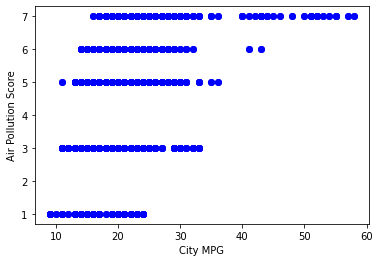

In [14]:
plt.scatter(df2.City_MPG, df2.Pollution_score,  color='blue')
plt.xlabel("City MPG")
plt.ylabel("Air Pollution Score")
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. 


In [15]:
msk = np.random.rand(len(df)) < 0.8
train = df2[msk]
test = df2[~msk]

#### Train data distribution


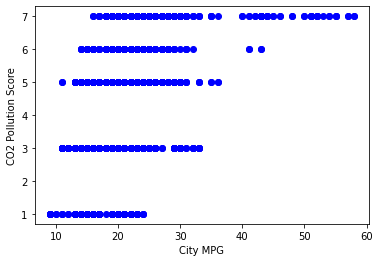

In [16]:
plt.scatter(train.City_MPG, train.Pollution_score,  color='blue')
plt.xlabel("City MPG")
plt.ylabel("CO2 Pollution Score")
plt.show()

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


Cylinder size, City MPG, Hwy MPG, Cmd MPG and CO2 combustions are expected to impact the Pollution Score and The Greenhouse score of vehicles. Green house score and pollution score are the two variables used to tell if your vehicle is "green" vehicel (SmartWay) vehicle.


In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['City_MPG','Hwy_MPG','Cmb_MPG','Comb_CO2']])
y = np.asanyarray(train[['Pollution_score']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 0.07835427 -0.08694681 -0.02363349 -0.01155652]]


As mentioned before, **Coefficient** and **Intercept** , are the parameters of the fit line. 
Given that it is a multiple linear regression, with 4 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain __Ordinary Least Squares__ method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\\hat{y}$) over all samples in the dataset.



<h2 id="prediction">Prediction</h2>


In [18]:
y_hat= regr.predict(test[['City_MPG','Hwy_MPG','Cmb_MPG','Comb_CO2']])
x = np.asanyarray(test[['City_MPG','Hwy_MPG','Cmb_MPG','Comb_CO2']])
y = np.asanyarray(test[['Pollution_score']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 2.20
Variance score: 0.27


### Repeat the same for Greenhouse gas score

We will use the same independent variables, but this time our dependent variable will be __Greenhouse gas score__.

In [19]:
from sklearn import linear_model
regr2 = linear_model.LinearRegression()
x = np.asanyarray(train[['City_MPG','Hwy_MPG','Cmb_MPG','Comb_CO2']])
y2 = np.asanyarray(train[['Greenhouse_score']])
regr2.fit (x, y2)
# The coefficients
print ('Coefficients: ', regr.coef_)


Coefficients:  [[ 0.07835427 -0.08694681 -0.02363349 -0.01155652]]


As you can see, __City MPG__ impacts both Pollution score and Greenhouse score positively; but __Hwy MPG, Cmb MPG & Comb CO2__ affects pollution score and Greenhouse score negatively.

### Prediction for Greenhouse gas score

In [20]:
y2_hat= regr.predict(test[['City_MPG','Hwy_MPG','Cmb_MPG','Comb_CO2']])
x = np.asanyarray(test[['City_MPG','Hwy_MPG','Cmb_MPG','Comb_CO2']])
y2 = np.asanyarray(test[['Greenhouse_score']])
print("Residual sum of squares: %.2f"
      % np.mean((y2_hat - y2) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y2))

Residual sum of squares: 0.84
Variance score: 0.71


### Comparison.

Variance score of 1.0 implies a perfect prediction. The closer the variance score to 1.0 is the better the model in predicting new values of a dependent variables given the independent variables.

With that in mind; City MPG, Hwy MPG, Cmb MPG and Comb CO2 is better in predicting Greenhouse score with a variance score of __0.71__ compared to Pollution Gas score with a variance score of __0.23__
